In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()
dataset = pd.DataFrame(data = data['data'], columns=data['feature_names'])
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
from sklearn.model_selection import train_test_split

X = dataset.copy()
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

In [5]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [6]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [7]:
predictions = clf.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)


from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=[0,1])



from sklearn.metrics import precision_score
precision_score(y_test, predictions)



from sklearn.metrics import recall_score
recall_score(y_test, predictions)



0.9363636363636364

In [9]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['malignant', 'benign']))

              precision    recall  f1-score   support

   malignant       0.91      0.95      0.93        78
      benign       0.96      0.94      0.95       110

    accuracy                           0.94       188
   macro avg       0.94      0.94      0.94       188
weighted avg       0.94      0.94      0.94       188



In [10]:
## feature Importance

feature_names = X.columns
feature_names

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [11]:
clf.feature_importances_

array([0.        , 0.0333478 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03056277, 0.        , 0.01062579,
       0.00863345, 0.        , 0.        , 0.01263116, 0.        ,
       0.        , 0.        , 0.03223155, 0.        , 0.03187736,
       0.        , 0.03608666, 0.71122398, 0.        , 0.        ,
       0.        , 0.        , 0.09277948, 0.        , 0.        ])

In [12]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
worst perimeter,0.711224
worst concave points,0.092779
worst texture,0.036087
mean texture,0.033348
concave points error,0.032232
fractal dimension error,0.031877
mean concave points,0.030563
area error,0.012631
mean fractal dimension,0.010626
radius error,0.008633


In [13]:
features = list(feature_importance[feature_importance[0]>0].index)
features

['worst perimeter',
 'worst concave points',
 'worst texture',
 'mean texture',
 'concave points error',
 'fractal dimension error',
 'mean concave points',
 'area error',
 'mean fractal dimension',
 'radius error']

<Axes: >

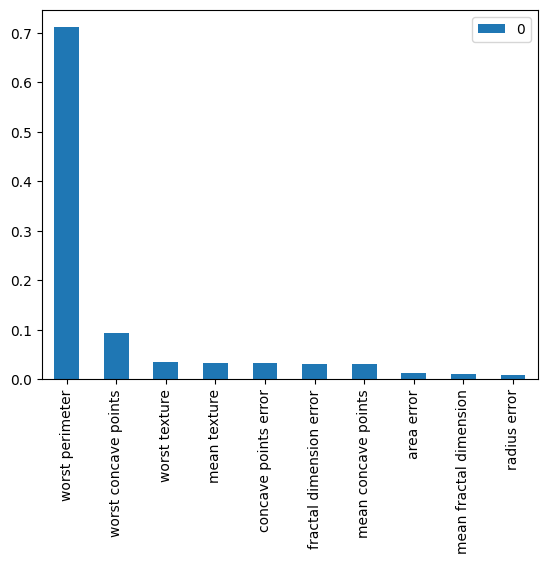

In [14]:
feature_importance.head(10).plot(kind='bar')

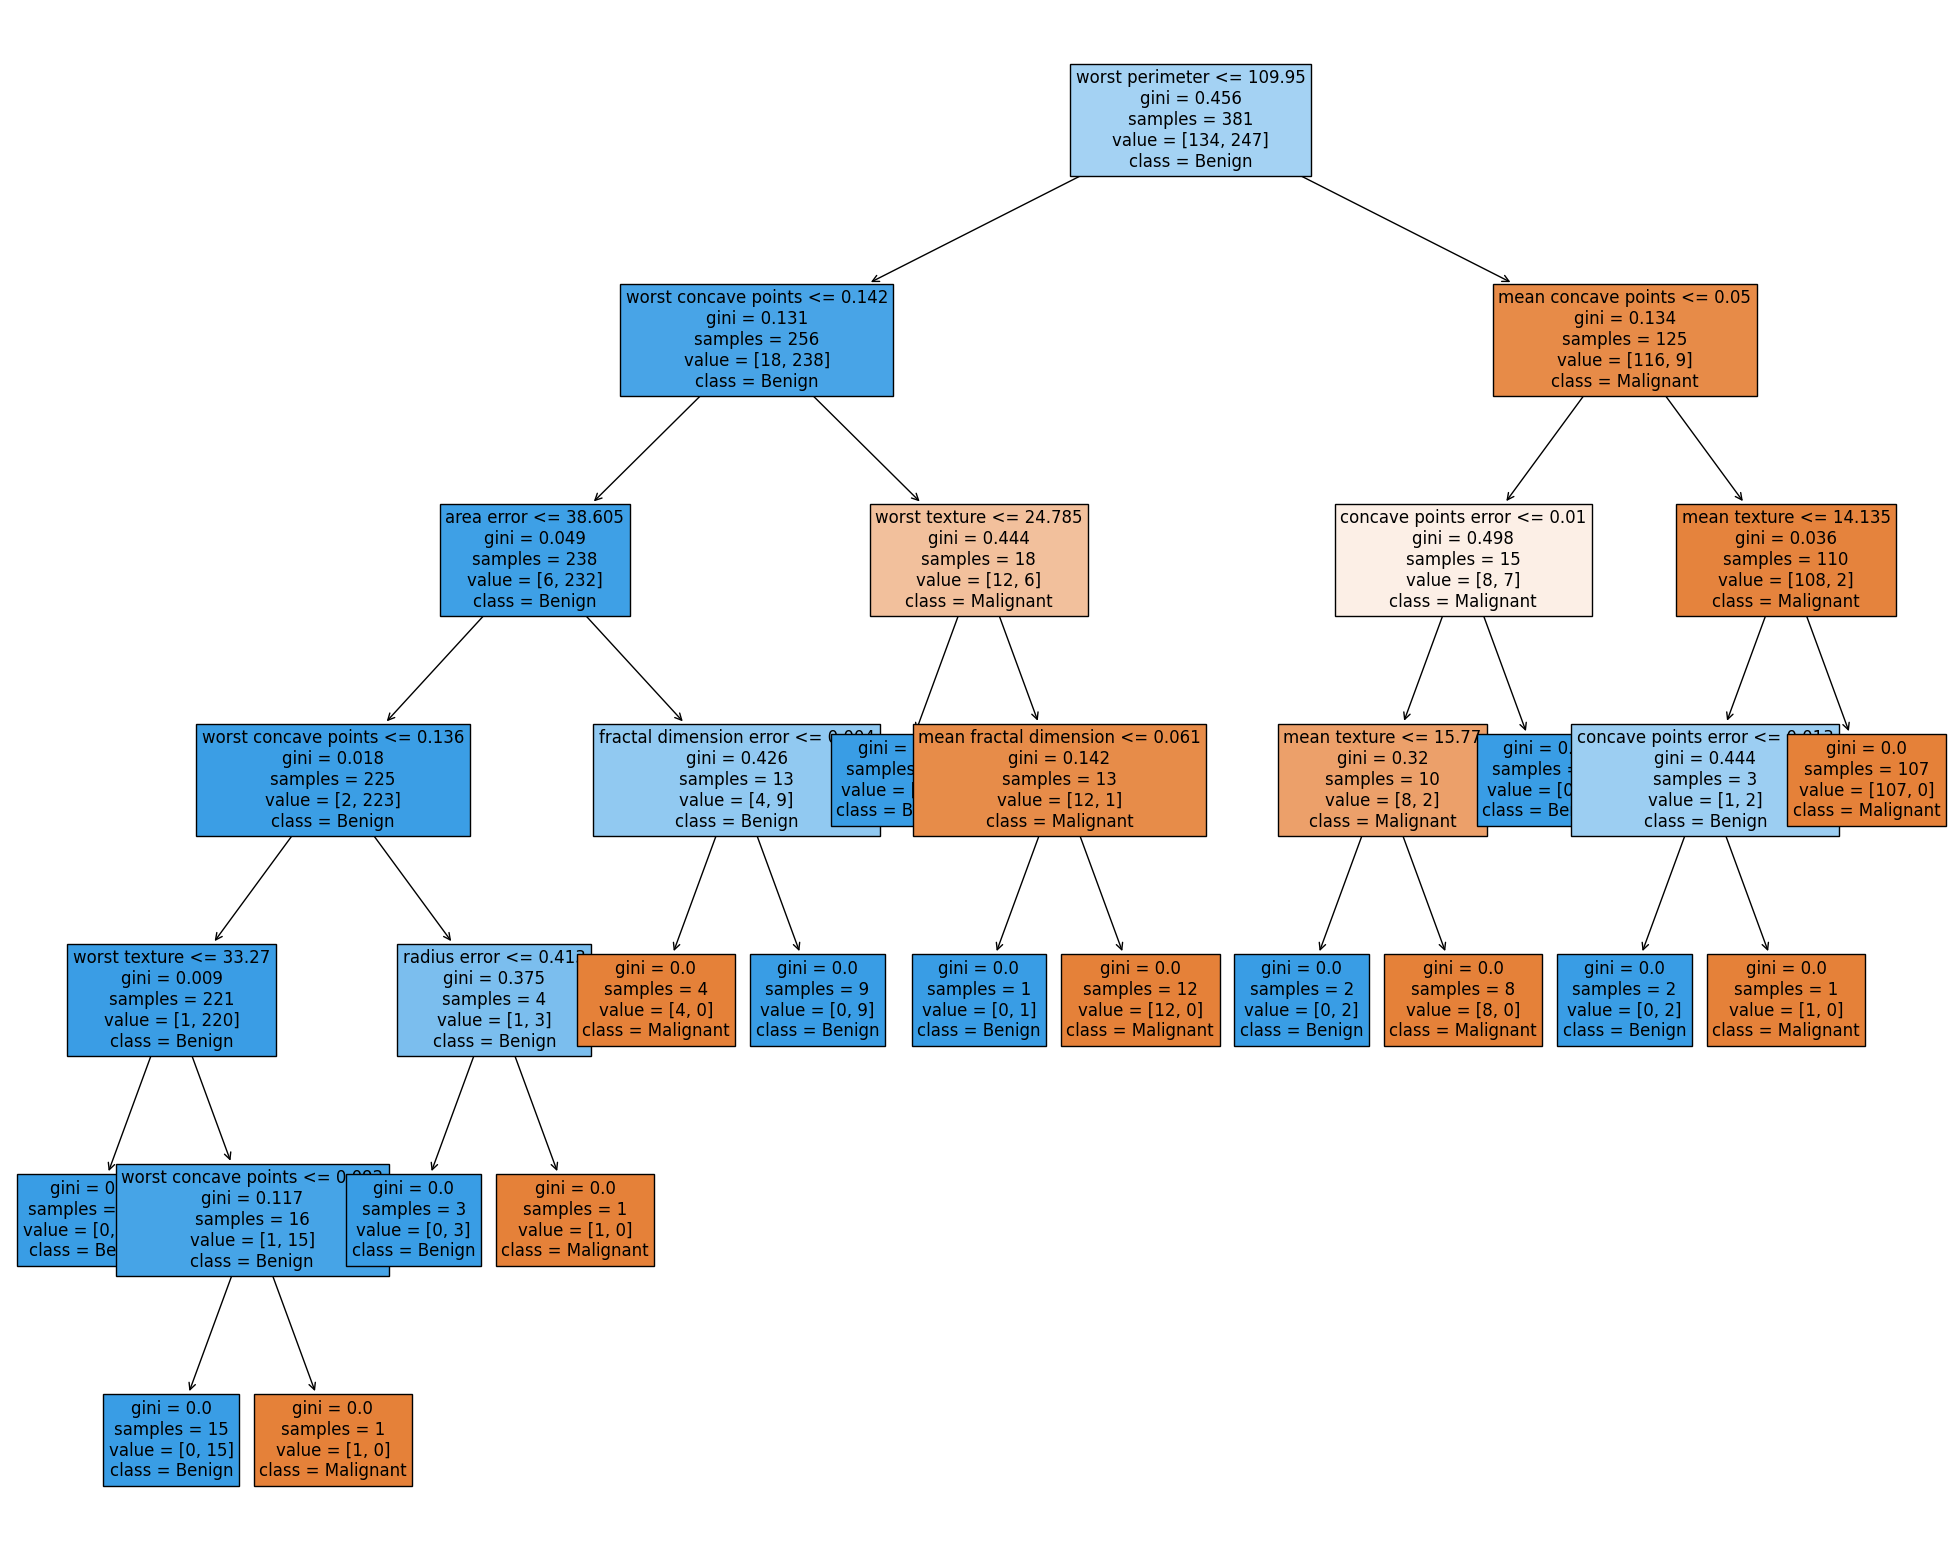

In [15]:
# visualize decision tree

from sklearn import tree
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_names,  
                   class_names={0:'Malignant', 1:'Benign'},
                   filled=True,
                  fontsize=12)